### Esercitazione 8 - ADL (Accumulation Distribution Line)
#### Argomenti

* indicatore ADL
* calcolo delle divergenze sui trend di ADL

L'indicatore di trend volumetrico ADL (Accumulation Distribution Line) è nato per segnalare movimenti interessanti
sui mercati tramite lo studio dei volumi sottostanti. Serve per misurare il flusso di denaro che entra ed esce dal
mercato ed è spesso usato osservando le divergenze tra il trend di questo indicatore ed il trend dei prezzi,
attendendo i momenti in cui i due trend divergono per generare un segnale di entrata o uscita su una posizione.    
    
E' calcolato secondo la seguente formula:    
    
Money Flow Multiplier = ((Close - Low) - (High - Close))/(High - Low)    
Money Flow Volume = Money Flow Multiplier * Volume    
ADL = somma su n periodi di Money Flow Volume    
    
Il Money Flow Multiplier esprima la relazione tra le chiusure dei prezzi in un periodo e il relativo delta di
oscillazione massimo High - Low ed è sempre nel range -1..1.    
Quando un periodo si chiude più spesso verso l'alto, tenderà ad 1, indicando una forte pressione di acquisto che,
combinata con alti volumi di scambio, porta a far crescere i valori di ADL. Inversamente, un moltiplicatore che tende
a -1 combinato con alti volumi di scambio indicherà un'alta pressione di vendita, facendo diminuire il valore
dell'ADL. Pertando questo indicatore può essere utilizzato per misurare la forza della pressione di acquisto o vendita
(accumulo e distribuzione), in grado di confermare trend in atto e anticipare inversioni di tendenza.

In [1]:
from Historic_Crypto import HistoricalData
from datetime import datetime, timedelta
import talib
import mplfinance as mpf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
end_date = datetime.now()
start_date = end_date - timedelta(days=60)
candles = HistoricalData(
    ticker='ETH-EUR',
    granularity=3600,
    start_date=start_date.strftime('%Y-%m-%d-%H-%M'),
    end_date=end_date.strftime('%Y-%m-%d-%H-%M'),
    verbose=False
).retrieve_data()

Provisional Start: 2022-08-19T15:06:00
Provisional End: 2022-09-01T03:06:00
Provisional Start: 2022-09-01T03:06:00
Provisional End: 2022-09-13T15:06:00
Provisional Start: 2022-09-13T15:06:00
Provisional End: 2022-09-26T03:06:00
Provisional Start: 2022-09-26T03:06:00
Provisional End: 2022-10-08T15:06:00
Provisional Start: 2022-10-08T15:06:00
Provisional End: 2022-10-21T03:06:00


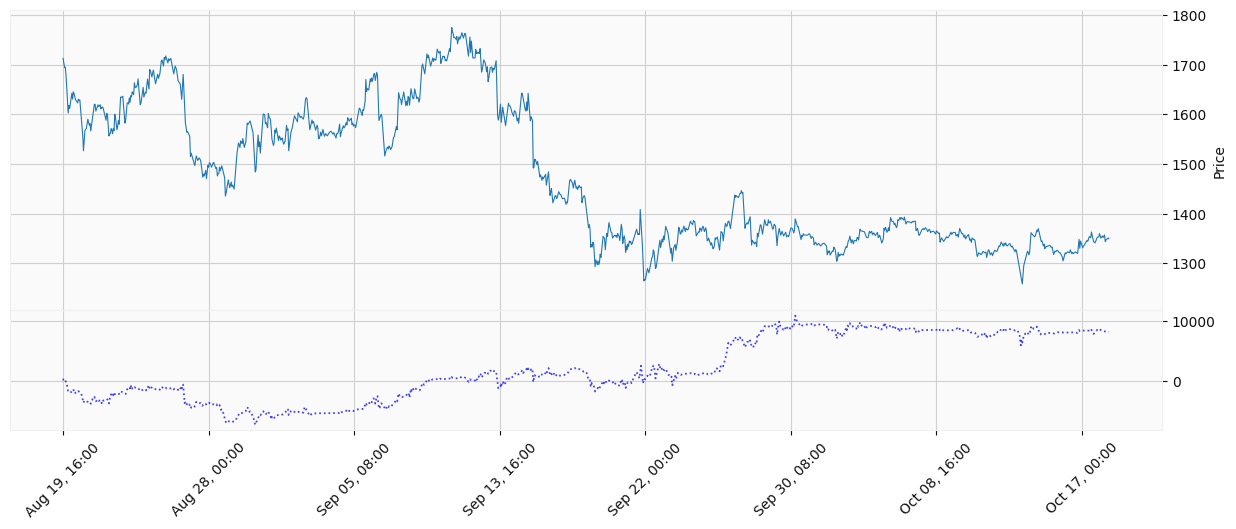

In [3]:
# utilizziamo la libreria TaLib per il calcolo dell'ADL
candles['adl'] = talib.AD(candles['high'], candles['low'], candles['close'], candles['volume'])

# visualizzazione dell'ADL su un grafico
adl_plot = mpf.make_addplot(candles['adl'], linestyle='dotted', alpha=0.75, color='blue', panel=1)
mpf.plot(candles, addplot=adl_plot, type='line', style='yahoo', figsize=(16, 6))

divergenza sul trend n° 5
divergenza sul trend n° 6
divergenza sul trend n° 8


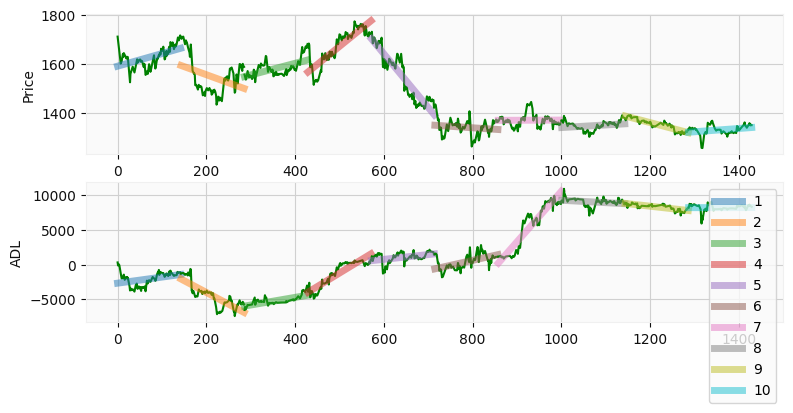

In [4]:
# definizione di un metodo per il calcolo e la visualizzazione dei trend ADL
def plot_trend_line(data, x_base, axes, title, id=None):
    xs = [x + x_base for x in range(len(data))]
    axes.plot(xs, data.values, ms=10, color='green')
    z = np.polyfit(xs, data.values, 1)
    ys = np.poly1d(z)(xs)
    axes.plot(xs, ys, linewidth=5, alpha=0.5, label=str(id))
    axes.set_ylabel(title)
    return ys[0] - ys[-1]

intervalli = 10
esempi = int(len(candles) / intervalli)

# visualizzazione dei trend dei prezzi e dell'ADL in intervalli del dataset
# ed evidenziazione dei momenti in cui si ha una divergenza tra i due trend

fig, (ax1, ax2) = plt.subplots(2, figsize=(9, 4))
for i in range(intervalli):
    price_trend = plot_trend_line(candles[i * esempi:i * esempi + esempi]['close'], esempi * i, ax1, 'Price')
    adl_trend = plot_trend_line(candles[i * esempi:i * esempi + esempi]['adl'], esempi * i, ax2, 'ADL', i + 1)
    if np.sign(price_trend) != np.sign(adl_trend):
        print('divergenza sul trend n°', i + 1)
plt.legend()
plt.show()